In [1]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir("drive/My Drive/ML")

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
def iqr_outlier(x, thre=1.5):
    x_cl = x.copy()
    q25, q75 = x.quantile(q=[0.25,0.75])
    iqr = q75 - q25
    top = q75 + thre * iqr
    bottom = q25 - thre * iqr
    
    x_cl[x_cl > top] = top
    x_cl[x_cl < bottom] = bottom 
    
    return x_cl
def combine_data(column_name,data):
  main_name = 'main ' + column_name
  sub_name = 'sub ' + column_name
  total = data[main_name] + data[sub_name]
  data.insert(len(data.columns), column_name,total)
  data.drop(main_name, axis = 1, inplace = True)
  data.drop(sub_name, axis = 1, inplace = True)

def drop_data(column_name,data):
  main_name = 'main ' + column_name
  sub_name = 'sub ' + column_name
  data.drop(main_name, axis = 1, inplace = True)
  data.drop(sub_name, axis = 1, inplace = True)

def opt_data(data,should_modify):
  print(data.shape)
  data.drop_duplicates(inplace=True)
  drop_data('account order number',data)
  combine_data('account active order number',data)
  drop_data('account overdue number',data)
  drop_data('account outstanding order',data)
  drop_data('account sanction order',data)
  drop_data('account disbursed order',data)

  drop_data('account inactive order number',data)
  drop_data('account monthly payment',data)
  combine_data('account tenure',data)
  data.drop('year of birth', axis = 1, inplace = True)
  data.drop('branch id', axis = 1, inplace = True)
  data.drop('manufacturer id', axis = 1, inplace = True)
  data.drop('area id', axis = 1, inplace = True)

  data.drop('staff code id', axis = 1, inplace = True)
  data.drop('disburse to sactioned ratio', axis = 1, inplace = True)
  data.drop('active to inactive act ratio', axis = 1, inplace = True)
  data.drop('outstanding disburse ratio', axis = 1, inplace = True)
  data.drop('order to asset ratio', axis = 1, inplace = True)
  for col in data.columns:
    if len(data[col].unique()) == 1:
      print(col)
      data.drop(col, axis = 1, inplace = True)

  for col in data.columns:
    cnt = data[col].count()
    per_set = list(data[col].unique())
    if len(per_set) in [cnt, cnt+1]:
      data.drop(col, axis = 1, inplace = True)
      print(col)
  for col in data.columns:
    rate = data[col].std()
    if rate < 0.1:
      print(col, rate)
      data.drop(col, axis = 1, inplace = True)
  if(should_modify):
    data = data[data['account tenure'] <= 1000]
    data['working flag'].fillna(0)
    data.fillna(data.median(), inplace=True)
    data_cl = data.copy()
    for col in data.columns:
      data_cl[col] = iqr_outlier(data[col])
    data = data_cl
    
  print(data.shape)
opt_data(df,True)

(120000, 52)
mobile number flag
id card flag
disbursed date
personal id
passport flag 0.04595872050643719


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


(102683, 22)


In [5]:

from sklearn.model_selection import train_test_split
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(84, input_shape=(21,), activation='relu'),
    keras.layers.Dense(42, activation='relu'),
    keras.layers.Dense(21, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
x, y = df.drop('loan default',axis=1),df['loan default']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25,random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10,batch_size=512)


(90000, 21) (30000, 21) (90000,) (30000,)
Epoch 1/10
176/176 [==============================] - 2s 5ms/step - loss: 7.7153 - accuracy: 0.7928 - val_loss: 0.7375 - val_accuracy: 0.8230
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.8233 - val_loss: 0.6015 - val_accuracy: 0.8230
Epoch 3/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5842 - accuracy: 0.8233 - val_loss: 0.5682 - val_accuracy: 0.8230
Epoch 4/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5546 - accuracy: 0.8233 - val_loss: 0.5423 - val_accuracy: 0.8230
Epoch 5/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5316 - accuracy: 0.8233 - val_loss: 0.5222 - val_accuracy: 0.8230
Epoch 6/10
176/176 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.8233 - val_loss: 0.5069 - val_accuracy: 0.8230
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5005 - accuracy: 0.8233 - val_

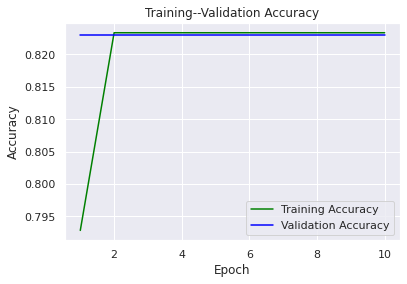

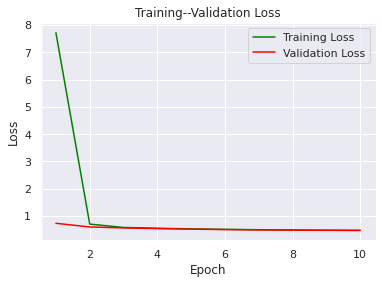

In [6]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy Graph
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training--Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
# Loss Graph
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training--Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import tensorflow as tf
def predict(model, X):
  pred = model.predict(X).flatten()
  print(pred)
  res = []
  for entry in pred:
    if(entry <= 0.5):
      res.append(0)
    else:
      res.append(1)
  return res
test = pd.read_csv('test.csv')
print(type(test))
opt_data(test,False)
print(type(test))
res = predict(model,tf.convert_to_tensor(test))
with open('/content/drive/My Drive/res.txt', 'w', encoding="utf-8") as f:
  for entry in res:
    f.write(str(entry) + '\n')

<class 'pandas.core.frame.DataFrame'>
(30000, 51)
mobile number flag
id card flag
disbursed date
personal id
passport flag 0.04790392982713523
(30000, 21)
<class 'pandas.core.frame.DataFrame'>
[1.0000000e+00 1.0000000e+00 5.2773952e-03 ... 7.5581045e-07 2.1776933e-07
 3.5054185e-07]
